# ProgrammingAssignment06_clusterAnalysis 

## 1. k-means using scikit-learn
The healthy_lifestyle dataset contains information on lifestyle measures such as amount of sunshine, pollution, and happiness levels for 44 major cities around the world. Apply k-means clustering to the cities' number of hours of sunshine and happiness levels.

- Import the needed packages for clustering.
- Initialize and fit a k-means clustering model using sklearn's Kmeans() function.
- Use the user-defined number of clusters, init='random', n_init=10, random_state=123, and algorithm='elkan'.
- Find the cluster centroids and inertia.

Ex: If the input is: 4

the output should be:

- Centroids: [[ 0.8294  0.2562]
 [ 1.3106 -1.887 ]
 [-0.9471  0.8281]
 [-0.6372 -0.7943]]
- Inertia: 16.4991

In [13]:
# Import needed packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

healthy = pd.read_csv('healthy_lifestyle.csv')

# Input the number of clusters
number = int(input())

# Define input features
X = healthy[['sunshine_hours', 'happiness_levels']]

# Use StandardScaler() to standardize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['sunshine_hours', 'happiness_levels'])
X = X.dropna()

# Initialize a k-means clustering algorithm with a user-defined number of clusters, init='random', n_init=10, 
# random_state=123, and algorithm='elkan'
kmeans = KMeans(n_clusters=number, init='random', n_init=10, random_state=123, algorithm='elkan')


# Fit the algorithm to the input features
kmeans.fit(X)

# Find and print the cluster centroids
centroid = kmeans.cluster_centers_
print("Centroids:", np.round(centroid,4))

# Find and print the cluster inertia
inertia = kmeans.inertia_
print("Inertia:", np.round(inertia,4))

 5


Centroids: [[-0.6372 -0.7943]
 [-0.9471  0.8281]
 [ 1.3106 -1.887 ]
 [ 1.7175  0.5766]
 [ 0.6073  0.176 ]]
Inertia: 13.1557


## 2. Hierarchical clustering using scikit-learn
The healthy_lifestyle dataset contains information on lifestyle measures such as amount of sunshine, pollution, and happiness levels for 44 major cities around the world. Apply agglomerative clustering to the cities' number of hours of sunshine and happiness levels using both sklearn and SciPy.

- Import the needed packages for agglomerative clustering from sklearn and SciPy.
- Initialize and fit an agglomerative clustering model using sklearn's AgglomerativeClustering() function. Use the user-defined number of clusters and ward linkage.
- Add cluster labels to the input feature dataframe.
- Calculate the distances between all instances using SciPy's pdist() function.
- Convert the distance matrix to a square matrix using SciPy's squareform() function.
- Define a clustering model with ward linkage using SciPy's linkage() function.

Ex: If the input is: 4

the output should be:
|       | sunshine_hours | happiness_levels | labels |
|-------|----------------|------------------|--------|
| 0     | -0.691660      | 1.025642         | 3      |
| 1     | 0.695725       | 0.801124         | 0      |
| 2     | -0.645295      | 0.872562         | 3      |
| 3     | -0.757641      | 0.933794         | 3      |
| 4     | -1.098246      | 1.229750         | 3      |


First five rows of the linkage matrix from SciPy:
    
 - [[39. 40.  0.  2.]
 [28. 43.  0.  3.]
 [ 7. 18.  0.  2.]
 [ 8. 42.  0.  2.]
 [ 0.  3.  0.  2.]]

In [15]:
# import pandas as pd
import seaborn as sns
import numpy as np

# Import needed sklearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Import needed scipy packages
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

# Silence warning
import warnings
warnings.filterwarnings('ignore')


healthy = pd.read_csv('healthy_lifestyle.csv')

# Input the number of clusters
number = int(input())

# Define input features
X = healthy[['sunshine_hours', 'happiness_levels']]

# Use StandardScaler() to standardize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['sunshine_hours', 'happiness_levels'])
X = X.dropna()

# Initialize and fit an agglomerative clustering model using ward linkage in scikit-learn, with a user-defined
# number of clusters
clustering = AgglomerativeClustering(n_clusters=number, linkage='ward')

# Add cluster labels to input feature dataframe
X['labels']=clustering.fit_predict(X)
print(X.head())

# Perform agglomerative clustering using SciPy

# Calculate the distances between all instances
distances = pdist(X)

# Convert the distance matrix to a square matrix
distance_matrix = squareform(distances)

# Define a clustering model with ward linkage
clustersHealthyScipy = linkage(distances, method='ward')

print('First five rows of the linkage matrix from SciPy:\n', np.round(clustersHealthyScipy[:5,:], 0))

 3


   sunshine_hours  happiness_levels  labels
0       -0.691660          1.025642       0
1        0.695725          0.801124       1
2       -0.645295          0.872562       0
3       -0.757641          0.933794       0
4       -1.098246          1.229750       0
First five rows of the linkage matrix from SciPy:
 [[39. 40.  0.  2.]
 [28. 43.  0.  3.]
 [ 7. 18.  0.  2.]
 [ 8. 42.  0.  2.]
 [36. 45.  0.  3.]]


## 3. DBSCAN using scikit-learn
- Increase the **number of points sampled to 500**.
- Apply the DBSCAN model with **epsilon=1** and **min_samples=8** to identify the number of core-points and outliers (or noise). 
- EX: if the epsilon=1 and min_samples = 10 and number of points sampled to 100.
  - the number of core-points = 85
  - the number of outliers    = 11

Labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

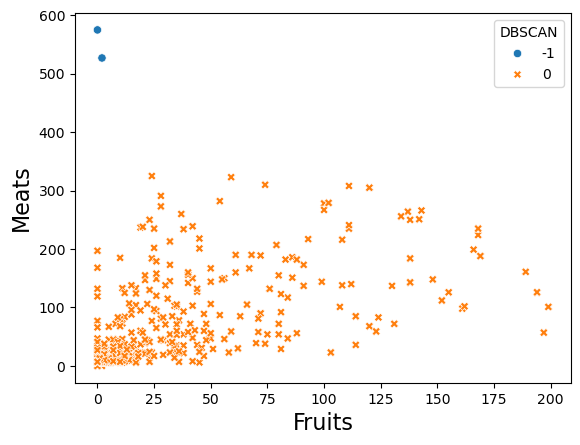

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the full grocery customer dataset and take a random sample of 500 instances
data = pd.read_csv('customer_personality.csv').sample(500, random_state=123)

# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# Apply DBSCAN with epsilon=1 and min_samples = 8   
dbscan = DBSCAN(eps=1, min_samples=8) 
dbscan = dbscan.fit(X)

# Print the cluster labels and core point indices
print('Labels:', dbscan.labels_)
print('Core points:', dbscan.core_sample_indices_) 
print('Number of core points:', len(dbscan.core_sample_indices_))
print('Number of outliers:', list(dbscan.labels_).count(-1))

# Add the cluster labels to the dataset as strings
data['clusters'] = dbscan.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters',
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='DBSCAN')